## General Workflow

### 1) Identifying Business Problem
### 2) Data Preprocessing
### 3) Exploratory Data Analysis (EDA)
### 4) Model Development & Evaluation
### 5) Model Interpretability

### 1) Identifying Business Problem

In this case, we're asked to develop a model for an organization that helps non-profit organizations to find donors. This model will be used to predict whether a donor will spend more than or equal to 30€, given that this donor receives a re-activation campaign. The model will be trained based on the previous campaign, and then validated with another data from other campaign.

The model is expected to have a good performance and high interpretability. In addition, we also have to emphasize why does implementing the model is better than random guessing campaign. In the end, the model will be used to predict potential customers for the upcoming campaign, and which customers are the most effective to reach.

### 2) Data Preprocessing

Our data consist of 5 csv files which includes the donor database, the amount of donated, and the selected donors during previous campaign

In [1]:
import sys
import subprocess
import importlib

packages = ['pandas', 'numpy','pathlib','os','glob', 'textblob']
[subprocess.check_call(['pip', 'install', pkg]) 
for pkg in packages if not importlib.util.find_spec(pkg)]

[0]

In [77]:
import pandas as pd
import numpy as np

from pathlib import Path
import pathlib
import os
import glob
from numpy import where

from textblob import TextBlob

In [78]:
# Change to working dir
os.chdir("Data")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Data'

### Load Data

In [79]:
# Loop through data folder and add all df's in a dict
data_dict={}
for txt_file in glob.glob("*.csv"):
    #list filenames
    filename = txt_file
    #create python tablenames
    df_name = str.replace(str.replace(txt_file,".csv","_raw")," ","_")
    #read files
    df_value = pd.read_csv(filename,  delimiter=",")
    #add to dict
    data_dict[df_name] = df_value

In [80]:
# Split dict into indivisual dataframes
for var in data_dict.keys():
    exec("{} = data_dict['{}']".format(var, var))

In [81]:
data_dict.keys()

dict_keys(['campaigns_raw', 'donors_raw', 'gifts_raw', 'selection_campaign_6169_raw', 'selection_campaign_7244_raw'])

In [82]:
donors_raw

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
0,0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986
...,...,...,...,...,...,...,...,...
44686,44686,144687,4900.0,Liege,Wallonia,M,FR,09/12/1970
44687,44687,144688,3600.0,Limburg,Flanders,M,NL,11/28/1972
44688,44688,144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967
44689,44689,144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976


In [83]:
# Check for null values
for keys in data_dict.keys():
    print(keys, ":", data_dict[keys].isna().sum().sum())

campaigns_raw : 0
donors_raw : 34
gifts_raw : 15637
selection_campaign_6169_raw : 0
selection_campaign_7244_raw : 0


### Data exploration

### Donors Data

In [84]:
donors_raw[donors_raw["gender"].isna()]

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
83,83,100084,1500.0,Flemish Brabant,Flanders,NaN,NL,03/16/1950
217,217,100218,1300.0,Walloon Brabant,Wallonia,NaN,FR,08/04/1979
512,512,100513,1933.0,Flemish Brabant,Flanders,NaN,NL,03/17/1952
552,552,100553,1560.0,Flemish Brabant,Flanders,NaN,FR,12/05/1952
729,729,100730,2950.0,Antwerp,Flanders,NaN,NL,11/09/1959
883,883,100884,2910.0,Antwerp,Flanders,NaN,NL,10/28/1977
1056,1056,101057,2200.0,Antwerp,Flanders,NaN,NL,04/20/1938
2050,2050,102051,3650.0,Limburg,Flanders,NaN,NL,08/16/1936
2209,2209,102210,3970.0,Limburg,Flanders,NaN,NL,04/05/1980
2379,2379,102380,5080.0,Namur,Wallonia,NaN,FR,06/30/1982


In [85]:
# Drop 1st Column
donors_raw = donors_raw.iloc[: , 1:]
donors_raw

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986
...,...,...,...,...,...,...,...
44686,144687,4900.0,Liege,Wallonia,M,FR,09/12/1970
44687,144688,3600.0,Limburg,Flanders,M,NL,11/28/1972
44688,144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967
44689,144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976


In [86]:
donors_raw['dateOfBirth'] = pd.to_datetime(donors_raw['dateOfBirth'])
donors_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   donorID      44691 non-null  int64         
 1   zipcode      44689 non-null  float64       
 2   province     44691 non-null  object        
 3   region       44691 non-null  object        
 4   gender       44659 non-null  object        
 5   language     44691 non-null  object        
 6   dateOfBirth  44691 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.4+ MB


In [87]:
import datetime

campaign6169 = datetime.datetime(2018, 9, 4)

donors_raw['Age'] = donors_raw['dateOfBirth'].apply(lambda row: campaign6169.year - row.year -((campaign6169.month, campaign6169.day) < (row.month, row.day) ))
donors_raw

,donorID,zipcode,province,region,gender,language,dateOfBirth,Age
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,50
1,100002,2260.0,Antwerp,Flanders,M,NL,1952-01-14,66
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,1986-12-23,31
3,100004,1020.0,Brussels,Brussels,F,FR,1952-03-29,66
4,100005,1020.0,Brussels,Brussels,F,FR,1986-06-25,32
...,...,...,...,...,...,...,...,...
44686,144687,4900.0,Liege,Wallonia,M,FR,1970-09-12,47
44687,144688,3600.0,Limburg,Flanders,M,NL,1972-11-28,45
44688,144689,3061.0,Flemish Brabant,Flanders,M,NL,1967-04-21,51
44689,144690,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07,42


In [88]:
# Change ANTWERP provinces to Antwerp

donors_raw['province'] = donors_raw['province'].apply(lambda row: 'Antwerp' if row == 'ANTWERP' else row)

# Check Changes
donors_raw['province'].unique()

array(['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant',
       'West Flanders', 'East Flanders', 'Liege', 'Luxembourg', 'Namur',
       'Hainaut', 'Limburg', 'Missing'], dtype=object)

In [89]:
# How many donors do we have in the database?
donors_raw['donorID'].nunique()

44691

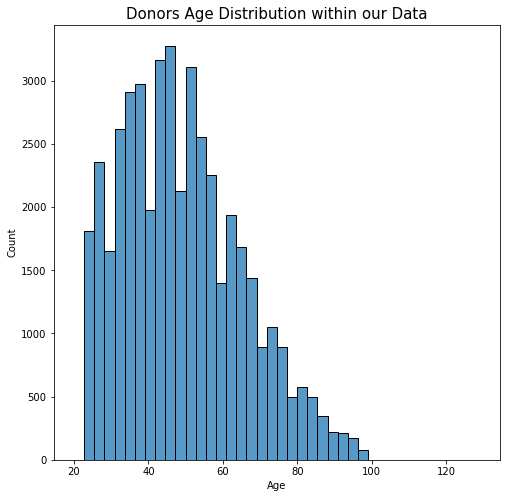

In [90]:
# Donors Age Distribution
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (8,8))
ax = sns.histplot(data = donors_raw, x="Age", bins = 40, palette ='viridis')
plt.title('Donors Age Distribution within our Data', fontsize = 15)

plt.show()

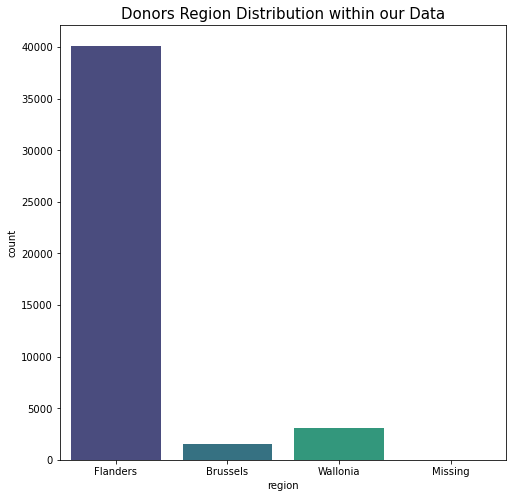

In [91]:
# Donors Region Distribution


fig, ax = plt.subplots(figsize = (8,8))
ax = sns.countplot(data = donors_raw, x="region", palette ='viridis')
plt.title('Donors Region Distribution within our Data', fontsize = 15)

plt.show()

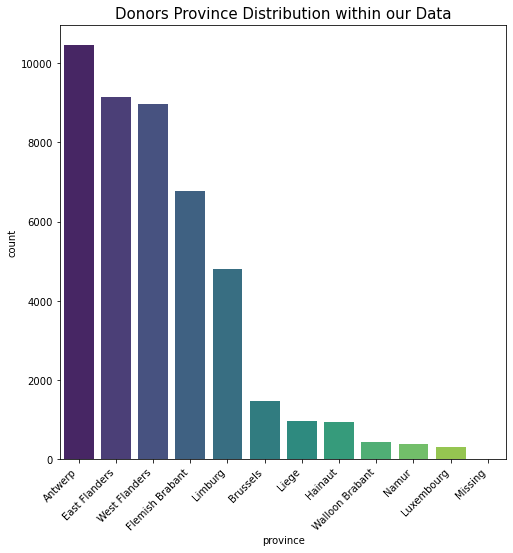

In [92]:
# Donors province Distribution


fig, ax = plt.subplots(figsize = (8,8))
ax = sns.countplot(data = donors_raw, x='province', order = donors_raw['province'].value_counts().index, palette ='viridis')
plt.title('Donors Province Distribution within our Data', fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

In [93]:
data = donors_raw.groupby('province')['donorID'].count().sort_values(ascending = False)
data

province
Antwerp            10450
East Flanders       9137
West Flanders       8964
Flemish Brabant     6781
Limburg             4818
Brussels            1488
Liege                970
Hainaut              944
Walloon Brabant      433
Namur                401
Luxembourg           303
Missing                2
Name: donorID, dtype: int64

In [94]:
donors_raw[donors_raw["language"]== 'EN']

,donorID,zipcode,province,region,gender,language,dateOfBirth,Age
533,100534,3080.0,Flemish Brabant,Flanders,M,EN,1982-06-07,36
5019,105020,NaN,Missing,Missing,M,EN,1966-11-09,51
6634,106635,3080.0,Flemish Brabant,Flanders,F,EN,1966-01-14,52
22100,122101,NaN,Missing,Missing,F,EN,1975-10-31,42
26348,126349,3080.0,Flemish Brabant,Flanders,M,EN,1954-06-23,64
43374,143375,3090.0,Flemish Brabant,Flanders,F,EN,1962-11-07,55


### Gifts Data

In [95]:
# CampaignID missing means that the donation was made outside of campaign, so it doesnt actually count as a missing values
gifts_raw.isna().sum()

Unnamed: 0        0
donorID           0
campaignID    15637
amount            0
date              0
dtype: int64

In [96]:
# Drop 1st Column
gifts_raw = gifts_raw.iloc[: , 1:]
gifts_raw

,donorID,campaignID,amount,date
0,100001,NaN,"12,39",2004-03-23
1,100001,1577.0,"12,39",2007-10-11
2,100001,1634.0,"6,69",2007-12-28
3,100001,1778.0,"24,79",2008-06-14
4,100001,1808.0,"7,44",2008-07-09
...,...,...,...,...
216589,265584,6169.0,"300,0",2018-09-23
216590,281770,6169.0,"30,0",2018-09-08
216591,317880,6169.0,"157,5",2018-09-12
216592,480980,6169.0,"36,0",2018-09-12


In [97]:
# There are 9 donors who's the data is not available within our database
gifts_raw['donorID'].nunique()

44700

In [98]:
gifts_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  int64  
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  object 
 3   date        216594 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.6+ MB


In [99]:
# Assume Independent Variable Period of 6 Months
iv_period = 180
in_between_period = 7

campaign6169 = datetime.datetime(2018, 9, 4)
end_period = campaign6169 - datetime.timedelta(days = in_between_period)
start_period = end_period - datetime.timedelta(days = iv_period)

print(end_period)
print(start_period)

2018-08-28 00:00:00
2018-03-01 00:00:00


In [100]:
# Change date into datetime object
gifts_raw['date'] = pd.to_datetime(gifts_raw['date'])

# Only select rows within our Independent Variable Timeline
gifts_cleaned = gifts_raw[(gifts_raw['date'] >= start_period) &  (gifts_raw['date'] <= end_period)]

In [101]:
# Make sure they all have the right timeline
print(gifts_cleaned['date'].min())

# Make sure they all have the right timeline
print(gifts_cleaned['date'].max())

2018-03-01 00:00:00
2018-08-28 00:00:00


In [102]:
# How many donors within our timeline?
gifts_cleaned['donorID'].nunique()

2258

In [103]:
gifts_cleaned['amount'] = gifts_cleaned['amount'].str.replace(',', '.')
gifts_cleaned['amount'] = gifts_cleaned['amount'].astype('float')
gifts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2778 entries, 16 to 216575
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     2778 non-null   int64         
 1   campaignID  2623 non-null   float64       
 2   amount      2778 non-null   float64       
 3   date        2778 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 108.5 KB


C:\Users\MMARCO~1\AppData\Local\Temp/ipykernel_10980/25209602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts_cleaned['amount'] = gifts_cleaned['amount'].str.replace(',', '.')
C:\Users\MMARCO~1\AppData\Local\Temp/ipykernel_10980/25209602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts_cleaned['amount'] = gifts_cleaned['amount'].astype('float')


In [104]:
date_agg = gifts_cleaned.groupby('donorID')['date'].agg('max')
date_agg

donorID
100003   2018-07-08
100005   2018-06-19
100033   2018-05-31
100038   2018-06-14
100047   2018-06-13
            ...    
144626   2018-06-25
144657   2018-03-11
144671   2018-06-24
144676   2018-05-08
144689   2018-06-25
Name: date, Length: 2258, dtype: datetime64[ns]

In [105]:
# Aggregate Data for each donors
gifts_cleaned = gifts_cleaned.groupby('donorID')['amount'].agg(['sum', 'count'])

# Reset Index and drop 2 level columns
gifts_cleaned = gifts_cleaned.reset_index()
#gifts_cleaned.columns = gifts_cleaned.columns.droplevel(0)

# Merge with aggregated Date
gifts_cleaned = pd.merge(gifts_cleaned, date_agg, how='left', on='donorID')

# Rename columns
gifts_cleaned.columns = ['donorID','total_donated','frequency_donor', 'last_date_dono']

gifts_cleaned.head()

,donorID,total_donated,frequency_donor,last_date_dono
0,100003,7.0,2,2018-07-08
1,100005,5.0,1,2018-06-19
2,100033,45.0,1,2018-05-31
3,100038,41.0,1,2018-06-14
4,100047,40.0,1,2018-06-13


In [106]:
gifts_cleaned['Recency_dono'] = end_period - gifts_cleaned['last_date_dono']
gifts_cleaned['Recency_dono'] = gifts_cleaned['Recency_dono'].dt.days
gifts_cleaned

,donorID,total_donated,frequency_donor,last_date_dono,Recency_dono
0,100003,7.0,2,2018-07-08,51
1,100005,5.0,1,2018-06-19,70
2,100033,45.0,1,2018-05-31,89
3,100038,41.0,1,2018-06-14,75
4,100047,40.0,1,2018-06-13,76
...,...,...,...,...,...
2253,144626,25.0,1,2018-06-25,64
2254,144657,41.0,1,2018-03-11,170
2255,144671,10.0,2,2018-06-24,65
2256,144676,40.0,1,2018-05-08,112


In [107]:
gifts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   donorID          2258 non-null   int64         
 1   total_donated    2258 non-null   float64       
 2   frequency_donor  2258 non-null   int64         
 3   last_date_dono   2258 non-null   datetime64[ns]
 4   Recency_dono     2258 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 105.8 KB


In [108]:
gifts_cleaned[gifts_cleaned['Recency_dono'] == 0]

,donorID,total_donated,frequency_donor,last_date_dono,Recency_dono
61,100903,5.0,1,2018-08-28,0
83,101285,50.0,1,2018-08-28,0
196,103212,250.0,3,2018-08-28,0
308,105300,5.0,1,2018-08-28,0
471,108639,200.0,2,2018-08-28,0
757,114830,61.0,2,2018-08-28,0
800,115988,50.0,1,2018-08-28,0
805,116171,10.0,2,2018-08-28,0
1004,120521,40.0,1,2018-08-28,0
1100,122527,25.0,1,2018-08-28,0


In [109]:
# Assume Dependent Variable Period of 1 Month
dv_period = 30

campaign6169 = datetime.datetime(2018, 9, 4)
end_period = campaign6169 + datetime.timedelta(days = dv_period)

print(end_period)

2018-10-04 00:00:00


In [110]:
# Only select rows within our Independent Variable Timeline
#gifts_dv = gifts_raw[(gifts_raw['date'] >= campaign6169) &  (gifts_raw['date'] <= end_period)]

# Only select rows within our Independent Variable Timeline
gifts_dv = gifts_raw[gifts_raw['campaignID'] == 6169]

# Make sure they all have the right timeline
print(gifts_dv['date'].min())

# Make sure they all have the right timeline
print(gifts_dv['date'].max())

2018-09-06 00:00:00
2018-09-24 00:00:00


In [111]:
gifts_dv[gifts_dv['campaignID'].isna()]

,donorID,campaignID,amount,date


In [112]:
# About 1191 donors responded to our 6169 campaign
gifts_dv['donorID'].nunique()

1191

In [113]:
# Example of Donors who donated, but we dont have his/her data in the donor database
donors_raw[donors_raw['donorID'] == 265584]

,donorID,zipcode,province,region,gender,language,dateOfBirth,Age


In [114]:
gifts_dv.groupby('donorID')['amount'].count().sort_values(ascending = False).head(10)

donorID
100023    1
129742    1
129665    1
129587    1
129512    1
129500    1
129493    1
129470    1
129395    1
129385    1
Name: amount, dtype: int64

In [115]:
gifts_dv['amount'] = gifts_dv['amount'].str.replace(',', '.')
gifts_dv['amount'] = gifts_dv['amount'].astype('float')

C:\Users\MMARCO~1\AppData\Local\Temp/ipykernel_10980/3404121275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts_dv['amount'] = gifts_dv['amount'].str.replace(',', '.')
C:\Users\MMARCO~1\AppData\Local\Temp/ipykernel_10980/3404121275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts_dv['amount'] = gifts_dv['amount'].astype('float')


In [116]:
# Aggregate Data for each donors
gifts_dv = gifts_dv.groupby('donorID')['amount'].agg('sum')

# Reset Index and drop 2 level columns
gifts_dv = gifts_dv.reset_index()

# Rename columns
gifts_dv.columns = ['donorID','total_donated_during_dv']

gifts_dv.head()

,donorID,total_donated_during_dv
0,100023,15.0
1,100126,123.0
2,100253,120.0
3,100279,75.0
4,100320,135.0


In [117]:
# Build Base Table Based On the 6169 Campaign Data
gifts_cleaned = pd.merge(selection_campaign_6169_raw,gifts_cleaned, how='left', on='donorID')

# Merge with iv table
gifts_cleaned = pd.merge(gifts_cleaned, gifts_dv, how='left', on='donorID')

# Merge with donor database
gifts_cleaned = pd.merge(gifts_cleaned, donors_raw, how='left', on='donorID')

In [118]:
gifts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34888 entries, 0 to 34887
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   donorID                  34888 non-null  int64         
 1   total_donated            198 non-null    float64       
 2   frequency_donor          198 non-null    float64       
 3   last_date_dono           198 non-null    datetime64[ns]
 4   Recency_dono             198 non-null    float64       
 5   total_donated_during_dv  1191 non-null   float64       
 6   zipcode                  34872 non-null  float64       
 7   province                 34874 non-null  object        
 8   region                   34874 non-null  object        
 9   gender                   34854 non-null  object        
 10  language                 34874 non-null  object        
 11  dateOfBirth              34874 non-null  datetime64[ns]
 12  Age                      34874 n

In [119]:
gifts_cleaned[(gifts_cleaned['total_donated_during_dv'].notnull()) & (gifts_cleaned['total_donated'].notnull())].count()

donorID                    38
total_donated              38
frequency_donor            38
last_date_dono             38
Recency_dono               38
total_donated_during_dv    38
zipcode                    38
province                   38
region                     38
gender                     38
language                   38
dateOfBirth                38
Age                        38
dtype: int64

In [120]:
gifts_cleaned['donated_more_than30_duringdv'] = gifts_cleaned['total_donated_during_dv'].apply(lambda row: 1 if row >= 30 else 0)
gifts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34888 entries, 0 to 34887
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   donorID                       34888 non-null  int64         
 1   total_donated                 198 non-null    float64       
 2   frequency_donor               198 non-null    float64       
 3   last_date_dono                198 non-null    datetime64[ns]
 4   Recency_dono                  198 non-null    float64       
 5   total_donated_during_dv       1191 non-null   float64       
 6   zipcode                       34872 non-null  float64       
 7   province                      34874 non-null  object        
 8   region                        34874 non-null  object        
 9   gender                        34854 non-null  object        
 10  language                      34874 non-null  object        
 11  dateOfBirth                 

In [121]:
# Example of Donors who were selected for a campaign, but we dont have his/her data in the donor database
selection_campaign_6169_raw[selection_campaign_6169_raw['donorID'] == 1474536]

,donorID
4361,1474536


### Base Table for the training set

Some info on this table:
- The basis table is the donors that were selected for campaign 6169
- IV period of 6 months, with gap period of 7 days
- DV period is not specified. Donors are selected on the basis of their reaction to the corresponding campaign (only takes into account campaign 6169)
- Granularity is DonorID

In [122]:
gifts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34888 entries, 0 to 34887
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   donorID                       34888 non-null  int64         
 1   total_donated                 198 non-null    float64       
 2   frequency_donor               198 non-null    float64       
 3   last_date_dono                198 non-null    datetime64[ns]
 4   Recency_dono                  198 non-null    float64       
 5   total_donated_during_dv       1191 non-null   float64       
 6   zipcode                       34872 non-null  float64       
 7   province                      34874 non-null  object        
 8   region                        34874 non-null  object        
 9   gender                        34854 non-null  object        
 10  language                      34874 non-null  object        
 11  dateOfBirth                 

In [123]:
# Example of Donors who donated, but we dont have his/her data in the donor database
gifts_cleaned[gifts_cleaned['donorID'] == 265584]

,donorID,total_donated,frequency_donor,last_date_dono,Recency_dono,total_donated_during_dv,zipcode,province,region,gender,language,dateOfBirth,Age,donated_more_than30_duringdv
27299,265584,NaN,NaN,NaT,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,1


In [124]:
# Donors who receives our campaign, but didnt donate during DV period and is inactive during IV period
gifts_cleaned[(gifts_cleaned['total_donated_during_dv'].isnull()) & (gifts_cleaned['total_donated'].isnull())]

,donorID,total_donated,frequency_donor,last_date_dono,Recency_dono,total_donated_during_dv,zipcode,province,region,gender,language,dateOfBirth,Age,donated_more_than30_duringdv
0,100001,NaN,NaN,NaT,NaN,NaN,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,50.0,0
1,100002,NaN,NaN,NaT,NaN,NaN,2260.0,Antwerp,Flanders,M,NL,1952-01-14,66.0,0
2,100004,NaN,NaN,NaT,NaN,NaN,1020.0,Brussels,Brussels,F,FR,1952-03-29,66.0,0
3,100008,NaN,NaN,NaT,NaN,NaN,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,81.0,0
4,100009,NaN,NaN,NaT,NaN,NaN,1020.0,Brussels,Brussels,M,FR,1932-01-20,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34882,144685,NaN,NaN,NaT,NaN,NaN,9860.0,East Flanders,Flanders,F,NL,1978-03-23,40.0,0
34883,144686,NaN,NaN,NaT,NaN,NaN,2440.0,Antwerp,Flanders,F,NL,1964-09-28,53.0,0
34884,144687,NaN,NaN,NaT,NaN,NaN,4900.0,Liege,Wallonia,M,FR,1970-09-12,47.0,0
34886,144690,NaN,NaN,NaT,NaN,NaN,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07,42.0,0


In [155]:
# Customers who we dont have his/her data in the donor database, but donates after receiving our 6169 Campaign
gifts_cleaned[gifts_cleaned['dateOfBirth'].isna()]

,donorID,total_donated,frequency_donor,last_date_dono,Recency_dono,total_donated_during_dv,zipcode,province,region,gender,...,donated_more_than30_duringdv,is_female,is_missing_gender,missing_zip,missing_age,is_flan,missing_prov,missing_lang,missing_dob,speaks_en
828,202036,NaN,NaN,NaT,NaN,21.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2182,205354,NaN,NaN,NaT,NaN,21.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4197,210268,NaN,NaN,NaT,NaN,300.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
4361,1474536,NaN,NaN,NaT,NaN,183.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
4891,317880,NaN,NaN,NaT,NaN,157.5,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
5090,212406,NaN,NaN,NaT,NaN,21.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
10648,225460,NaN,NaN,NaT,NaN,24.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
13208,231512,NaN,NaN,NaT,NaN,24.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
17033,480980,NaN,NaN,NaT,NaN,36.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
22296,253280,NaN,NaN,NaT,NaN,24.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [128]:
#create is_female variable
gifts_cleaned['is_female'] = where(gifts_cleaned["gender"]=='M', 1, 0)


In [129]:
#create is missing_gender variable
gifts_cleaned['is_missing_gender'] = where(gifts_cleaned["gender"]=='NaN', 1, 0)


In [134]:
#create missing_zipcode variable
gifts_cleaned['missing_zip'] = where(gifts_cleaned["zipcode"]=='NaN', 1, 0)

In [137]:
#create missing age variable
gifts_cleaned['missing_age'] = where(gifts_cleaned["Age"]=='NaN', 1, 0)

In [139]:
#create variable is Flanders
gifts_cleaned['is_flan'] = where(gifts_cleaned["region"]=='Flanders', 1, 0)


In [186]:
#create variable missing province
gifts_cleaned['missing_prov'] = where(gifts_cleaned["province"]=='NaN', 1, 0)


KeyError: 'province'

In [187]:
#create variable missing language
gifts_cleaned['missing_lang'] = where(gifts_cleaned["language"]=='NaN', 1, 0)

In [188]:
#create variables for languages
gifts_cleaned['speaks_en'] = where(gifts_cleaned["language"]=='EN', 1, 0)
gifts_cleaned['speaks_dutch'] = where(gifts_cleaned["language"]=='NL', 1, 0)
gifts_cleaned['speaks_fr'] = where(gifts_cleaned["language"]=='FR', 1, 0)

In [189]:
#create variable missing dob
gifts_cleaned['missing_dob'] = where(gifts_cleaned["dateOfBirth"]=='NaT', 1, 0)

In [190]:
#drop variables that arent necessary for the model
gifts_cleaned.pop('total_donated_during_dv')
gifts_cleaned.pop('province')
gifts_cleaned.pop('region')


KeyError: 'total_donated_during_dv'

In [193]:
gifts_cleaned.columns


Index(['donorID', 'total_donated', 'frequency_donor', 'last_date_dono',
       'Recency_dono', 'zipcode', 'gender', 'language', 'dateOfBirth', 'Age',
       'donated_more_than30_duringdv', 'is_female', 'is_missing_gender',
       'missing_zip', 'missing_age', 'is_flan', 'missing_prov', 'missing_lang',
       'missing_dob', 'speaks_en', 'missing_reg', 'speaks_dutch', 'speaks_fr'],
      dtype='object')

In [192]:
gifts_cleaned.head()

,donorID,total_donated,frequency_donor,last_date_dono,Recency_dono,zipcode,gender,language,dateOfBirth,Age,...,missing_zip,missing_age,is_flan,missing_prov,missing_lang,missing_dob,speaks_en,missing_reg,speaks_dutch,speaks_fr
0,100001,NaN,NaN,NaT,NaN,1861.0,F,NL,1967-12-24,50.0,...,0,0,1,0,0,0,0,0,1,0
1,100002,NaN,NaN,NaT,NaN,2260.0,M,NL,1952-01-14,66.0,...,0,0,1,0,0,0,0,0,1,0
2,100004,NaN,NaN,NaT,NaN,1020.0,F,FR,1952-03-29,66.0,...,0,0,0,0,0,0,0,0,0,1
3,100008,NaN,NaN,NaT,NaN,1780.0,M,FR,1937-08-30,81.0,...,0,0,1,0,0,0,0,0,0,1
4,100009,NaN,NaN,NaT,NaN,1020.0,M,FR,1932-01-20,86.0,...,0,0,0,0,0,0,0,0,0,1
